In [0]:
import pystan
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving call_center.csv to call_center.csv


In [0]:
import io
waiting_times_day = np.loadtxt(io.BytesIO(uploaded['call_center.csv']))

Size of data set: 5856
First 3 values in data set: [30.   3.4  3.2]
Sum of data set: 1441.6838153800093


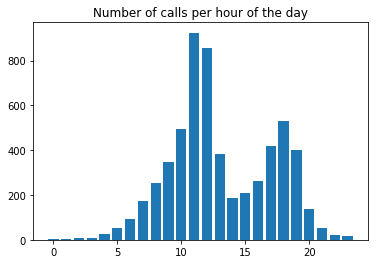

In [0]:
print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

# Split the data into 24 separate series, one for each hour of the day
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

# Plot the number of calls per hour
plt.bar(range(24), [len(w) for w in waiting_times_per_hour])
plt.title('Number of calls per hour of the day')
plt.show()

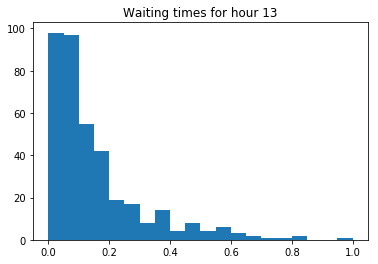

382

In [0]:
#This code is plotting the number of calls per hour 13th
hour_index = 13
waiting_times_hour = waiting_times_per_hour[hour_index]
plt.hist(waiting_times_hour, bins=20)
plt.title('Waiting times for hour %i' % hour_index)
plt.show()
len(waiting_times_hour)

In [0]:
#The start of question 1

# For Stan we provide all known quantities as data, namely the observed data
# and our prior hyperparameters.
call_center_data = {
    'hour13': {
        'alpha': 1,  # fixed prior hyperparameters for the
        'beta': 0.25,   # beta distribution
        'num_trials': 382,
        'waittimein13': waiting_times_hour}}

In [0]:
# Below is the Stan code for the medical trial data set. Note that the Stan
# code is a string that is passed to the StanModel object below.

# We have to tell Stan what data to expect, what our parameters are and what
# the likelihood and prior are. Since the posterior is just proportional to
# the product of the likelihood and the prior, we don't distinguish between
# them explicitly in the model below. Every distribution we specify is
# automatically incorporated into the product of likelihood * prior.

stan_code1 = """

// The data block contains all known quantities - typically the observed
// data and any constant hyperparameters.
data {
    real<lower=0> waittimein13[382];  // Waiting times for hour 13
    real<lower=0> alpha;  // fixed prior hyperparameter
    real<lower=0> beta;   // fixed prior hyperparameter
}

// The parameters block contains all unknown quantities - typically the
// parameters of the model. Stan will generate samples from the posterior
// distributions over all parameters.
parameters {
    real<lower=0> lambda;  Identifying the unkowen parameter for the exponential likelihood
}

// The model block contains all probability distributions in the model.
model {
    lambda ~ gamma(alpha, beta);   #identifying the gamma prior distribution
    waittimein13 ~ exponential(lambda);  #identifying the exponential likelihood distribution
    
}

"""

In [0]:
#Compiling a Stan model 
stan_model = pystan.StanModel(model_code=stan_code1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d2b31f128891b510999a48ccfa25bdd7 NOW.


In [0]:
# Fit the model to the data. This will generate samples from the posterior over
# all parameters of the model. We start by computing posteriors for hour 13 data 

#Posterior 98% confidence interval for lambda: [5.64372875 7.13763803]
stan_results = stan_model.sampling(data=call_center_data['hour13'])
print(stan_results.stansummary(pars=['lambda'], probs=[.01, .99]))

Inference for Stan model: anon_model_d2b31f128891b510999a48ccfa25bdd7.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd     1%    99%  n_eff   Rhat
lambda   6.36  9.4e-3   0.33   5.64   7.14   1232    1.0

Samples were drawn using NUTS at Wed Oct 16 18:20:48 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


Posterior 98% confidence interval for lambda: [5.64372875 7.13763803]


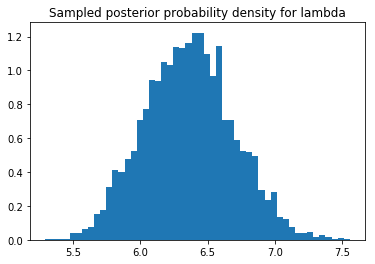

In [0]:
posterior_samples = stan_results.extract()
plt.hist(posterior_samples['lambda'], bins=50, density=True)
plt.title('Sampled posterior probability density for lambda')
print(
    "Posterior 98% confidence interval for lambda:",
    np.percentile(posterior_samples['lambda'], [1, 99]))
plt.show()

In [4]:
#Uploading the data to the notebook
data = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])
print(len(data), "data")

200 data


In [5]:
print('Data sample mean:', np.mean(data))
print('Data sample variance:', np.var(data))

Data sample mean: 3.065080189542003
Data sample variance: 3.6152141787699223


In [0]:
#The start of question 2
# For Stan we provide all known quantities as data, namely the observed data
# and our prior hyperparameters.
q2_data = {
    'newdata': {
        'alpha': 1.12,  # fixed prior hyperparameters for the
        'beta': 0.4,   # beta distribution
        'mu':0,
        'nu':0.054,
        'num_trials': 200,
        'normal_data': data}}

In [0]:
stan_code2 = """

// The data block contains all known quantities - typically the observed
// data and any constant hyperparameters.
data {
    real<lower=-2> normal_data[200]; #The uploaded data
    real<lower=0> alpha;  // fixed prior hyperparameter
    real<lower=0> beta;   // fixed prior hyperparameter
    real<lower=-100> mu;  // fixed prior hyperparameter
    real<lower=0> nu;     // fixed prior hyperparameter
}

// The parameters block contains all unknown quantities - typically the
// parameters of the model. Stan will generate samples from the posterior
// distributions over all parameters.
parameters {
    real<lower=0> meann;  //Identifying the unkowen parameters for the normal likelihood
    real<lower=0> variancee;
}

// The model block contains all probability distributions in the model.
// This of this as specifying the generative model for the scenario.
model {
    variancee ~ inv_gamma(alpha, beta);
    meann~normal(mu, 1/nu);
    normal_data~ normal(meann,sqrt(variancee));
    
}

"""

In [8]:
#Running and initializing the model 
stan_model2 = pystan.StanModel(model_code=stan_code2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4507ee329f3110dbcb3182e7c446fd58 NOW.


In [9]:
stan_results2 = stan_model2.sampling(data=q2_data['newdata'])
print(stan_results2.stansummary(pars=['meann','variancee'], probs=[.025, .975]))
# 95% posterior confidence intervals:
# x: [2.8, 3.32]
# σ²: [2.97, 4.42]

Inference for Stan model: anon_model_4507ee329f3110dbcb3182e7c446fd58.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%  97.5%  n_eff   Rhat
meann       3.06  2.4e-3   0.13    2.8   3.32   3210    1.0
variancee   3.63  6.0e-3   0.37   2.97   4.42   3692    1.0

Samples were drawn using NUTS at Fri Oct 18 13:31:41 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [14]:
result=stan_model2.sampling(data=q2_data['newdata'])
print(result.extract())

OrderedDict([('meann', array([3.02826836, 3.29030248, 3.02055712, ..., 3.157158  , 3.18080665,
       3.04586864])), ('variancee', array([3.86135227, 4.50966953, 3.0523789 , ..., 3.51432709, 3.98288702,
       3.85873861])), ('lp__', array([-229.28454767, -232.51350239, -230.3850403 , ..., -229.18314422,
       -229.81152685, -229.24839616]))])


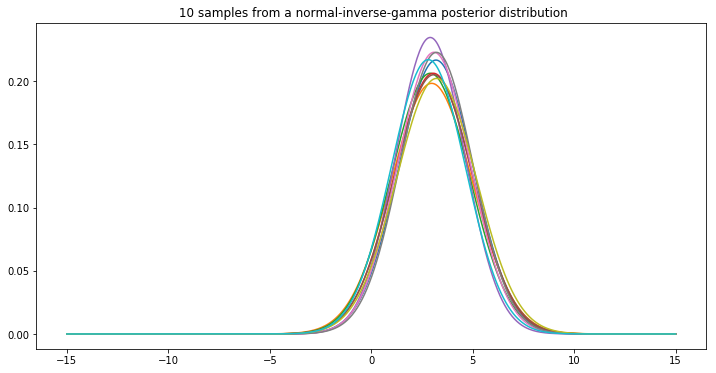

95% prior confidence intervals:
x: [2.797, 3.325]
σ²: [3.013, 4.442]


In [64]:
plt.figure(figsize=(12, 6))
plot_x = np.linspace(-15, 15, 500)
result=stan_model2.sampling(data=q2_data['newdata'])
posterior_samples=result.extract()
for i in range(10):
    plot_y = stats.norm.pdf(plot_x, loc=posterior_samples['meann'][i], scale=np.sqrt(posterior_samples['variancee'][i]))
    plt.plot(plot_x, plot_y)

plt.title(' 10 samples from a normal-inverse-gamma posterior distribution')
plt.show()

print('95% prior confidence intervals:')
print('x: [%.3f, %.3f]' % (
    np.percentile(posterior_samples['meann'], 2.5),
    np.percentile(posterior_samples['meann'], 97.5)))
print('σ²: [%.3f, %.3f]' % (
    np.percentile(posterior_samples['variancee'], 2.5),
    np.percentile(posterior_samples['variancee'], 97.5)))

In [26]:
from google.colab import files
uploaded = files.upload()

Saving hrtem.csv to hrtem.csv


In [0]:
import io
q3_data = np.loadtxt(io.BytesIO(uploaded['hrtem.csv']))

In [47]:
print(len(q3_data))
print(min(q3_data),max(q3_data))

500
1.05182743421756 28.9425775960553


In [0]:
#The start of question 2
# For Stan we provide all known quantities as data, namely the observed data
# and our prior hyperparameters.

q3_data = {
    'hrtemdata': {
        'alpha': 2,  # fixed prior hyperparameters for the
        'beta': 5,   # beta distribution
        'mu':2.3,
        'nu':0.1,
        'num_trials': 500,
        'hrtem_data': q3_data}}

In [0]:
stan_code3 = """

// The data block contains all known quantities - typically the observed
// data and any constant hyperparameters.
data {
    real<lower=0> hrtem_data[500]; 
    real<lower=0> alpha;  // fixed prior hyperparameter
    real<lower=0> beta;   // fixed prior hyperparameter
    real<lower=-100> mu;  // fixed prior hyperparameter
    real<lower=0> nu;   // fixed prior hyperparameter
}

transformed data {                     #Here I added a transformed data block to make the mathmatical computation of the data and 
  real y[500];                         #produce Normal likelihood log-transformed
  for (n in 1:500){
    y[n] <- log(hrtem_data[n]);          
}
}

// The parameters block contains all unknown quantities - typically the
// parameters of the model. Stan will generate samples from the posterior
// distributions over all parameters.
parameters {
    real<lower=0> post_mean;  // //Identifying the unkowen parameters for the normal likelihood
    real<lower=0> post_variance;
}

// The model block contains all probability distributions in the model.
// This of this as specifying the generative model for the scenario.
model {
    post_variance ~ inv_gamma(alpha, beta);
    post_mean~normal(mu, 1/nu);
    y~ normal(post_mean,sqrt(post_variance));
    
}

"""

In [42]:
#Running and initializing the model 
stan_model3 = pystan.StanModel(model_code=stan_code3)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_415e557c0f4d49c38f6650076d1fc839 NOW.


In [51]:
stan_results3 = stan_model3.sampling(data=q3_data['hrtemdata'])
print(stan_results3.stansummary(pars=['post_mean','post_variance'], probs=[.025, .975]))

Inference for Stan model: anon_model_415e557c0f4d49c38f6650076d1fc839.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                mean se_mean     sd   2.5%  97.5%  n_eff   Rhat
post_mean       1.89  5.5e-4   0.03   1.83   1.96   3396    1.0
post_variance    0.5  6.5e-4   0.03   0.44   0.56   2498    1.0

Samples were drawn using NUTS at Fri Oct 18 15:28:43 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


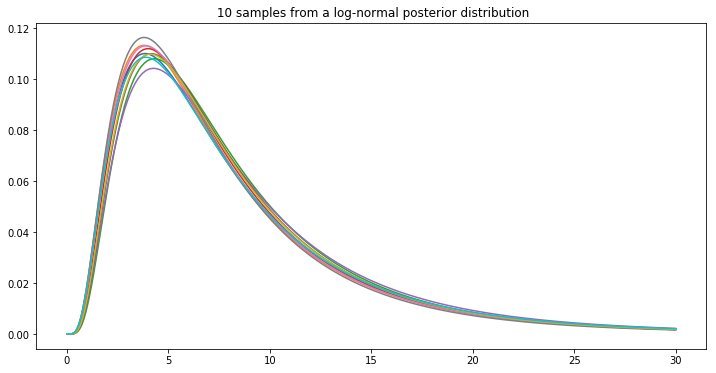

In [61]:
plt.figure(figsize=(12, 6))
plot_x = np.linspace(0, 30, 500)
result=stan_model3.sampling(data=q3_data['hrtemdata'])
posterior_samples=result.extract()
for i in range(10):
    plot_y = stats.lognorm.pdf(plot_x, s=np.sqrt(posterior_samples['post_variance'][i]),scale=np.exp(posterior_samples['post_mean'][i]))
    plt.plot(plot_x, plot_y)

plt.title(' 10 samples from a log-normal posterior distribution')
plt.show()

In additional to the mentioned HCs in the assignment (#Probability,#Professionalism), I have applied #Algorithms. 

I have identified an appropriate algorithmic strategy of transforming the provided python code into stan code. I accurately implemented and interpreted the code from the solution manual and I was carful in identifying the data in the stan code. 